## python 社群
- Python Taiwan : https://www.facebook.com/groups/pythontw

- PyHug : https://www.meetup.com/pythonhug

- Taipei.py : https://www.meetup.com/Taipei-py

- Tainan.py :https://www.meetup.com/Tainan-py-Python-Tainan-User-Group

- Kaohsiung.py :https://www.meetup.com/Kaohsiung-Python-Meetup

- Taichung.py :https://www.facebook.com/groups/780250978715991

- Hualien.Py :https://www.meetup.com/Hualien-Py

- Nantou.py : https://www.facebook.com/profile.php?id=100070205115112

- PyLadies Taiwan :https://tw.pyladies.com

- Astrohackers in Taiwan : https://www.facebook.com/groups/astrohackers.tw.py

## 天文相關資源
- 天聞的資料科學:https://github.com/YihaoSu/data-science-with-astronomy-news
- 獵星者旅店:https://chat.openai.com/g/g-LGVdyZVRU-tian-wen-xue-python-rpg-lie-xing-zhe-lu-dian

## 套件安裝
- Astropy	提供天文研究常用的基本工具，例如座標系統、時間系統、物理單位的轉換以及檔案讀寫操作。
- Astroquery	用來查詢和下載各種天文資料庫的資料。
- SunPy	提供太陽觀測資料下載、分析與視覺化的工具。
- Lightkurve	用於分析 Kepler 和 TESS 太空望遠鏡的光變曲線資料，以便尋找和研究系外行星。
- photutils	用於天文影像的光度學分析，例如測量星體的光度。
- specutils	用於分析星體光譜，包括讀取、擬合、視覺化光譜資料。
- AstroML	提供機器學習和資料探勘的工具來分析天文資料。

In [1]:
!pip install astropy
!pip install astroquery

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/5.3 MB ? eta -:--:--
   ------- -------------------------------- 1.0/5.3 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 5.3/5.3 MB 24.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/994.8 kB ? eta -:--:--
   --------------------------------------- 994.8/994.8 kB 48.8 MB/s eta 0:00:00


In [ ]:
# TODO: 查詢天體資料
from astropy import units as u
from astroquery. simbad import Simbad
# Simbad 是一個大型的天文數據庫，提供了天體的坐標、光度、類型等詳細資料

result = Simbad.query_object("M31")
result

# 也可以透過他的API查詢：https://simbad.cds.unistra.fr/simbad/sim-fbasic

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,int32
M 31,00 42 44.330,+41 16 07.50,7,7,--,--,0,C,I,2006AJ....131.1163S,1


## 使用python觀測星體方位

### 探索星體方位
每個小孩子去知道自己的星座(天蠍座 (Scorpius))
- 尋找星座中的亮星
	- 亮星：心宿二 (Antares)
	- 特點：紅色的巨星，位於天蠍座的「心臟」位置。
	- 故事：心宿二像是一顆紅色的寶石，被認為是天蠍的心臟，非常適合天蠍座的小朋友。	


In [16]:
# TODO: 選擇行星
Antares = SkyCoord. from_name ("Antares")

In [20]:
from astroquery.simbad import Simbad

# 新增 FLUX_V 欄位到查詢中
Simbad.add_votable_fields('flux(V)')

# 查詢心宿二的資訊
result_table = Simbad.query_object("Antares")

if result_table and 'FLUX_V' in result_table.colnames:
    # 取得視星等 (Visual Magnitude)
    visual_mag = result_table['FLUX_V'][0]
    print(f"心宿二的視星等 (亮度) 是: {visual_mag}")
else:
    print("無法查詢到心宿二的亮度資訊或亮度資訊不存在。")


心宿二的視星等 (亮度) 是: 0.9100000262260437


- 視星等（Apparent Magnitude）是用來衡量一顆天體從地球觀測到的亮度。
- 視星等的計算方式是倒數制的，數字越小代表亮度越高，數字越大則表示亮度越低。

- 負值視星等：非常亮的天體，例如太陽（約 -26.74），月亮（約 -12.74）和金星（約 -4.89）。
- 正值視星等：越高的正數代表天體越暗，肉眼可見的星等大約在 6 等以內。
- 在視星等中，星等差 5 倍代表亮度差約 100 倍。因此，一等星的亮度比六等星亮約 100 倍。
    - 心宿二（Antares）的視星等約為 1.0，屬於一等星（亮度較高且較明亮）。
    - 北極星（Polaris）的視星等約為 2.0，屬於二等星

In [21]:
# TODO: 查詢心宿二的位置
from astropy.coordinates import SkyCoord


print(f"心宿二的赤經是:{Antares.ra},赤緯是:{Antares.dec}")

心宿二的赤經是:247.35191542 deg,赤緯是:-26.432002612 deg


In [22]:
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.time import Time
import astropy.units as u
from datetime import datetime, timezone, timedelta

# 定義觀測時間
taiwan_time = datetime.strptime('2024-11-06 21:00:00', '%Y-%m-%d %H:%M:%S')
taiwan_timezone = timezone(timedelta(hours=8))
taiwan_time = taiwan_time.replace(tzinfo=taiwan_timezone)
utc_time = taiwan_time.astimezone(timezone.utc)
obs_time = Time(utc_time)

# 定義觀測地點（位於成大工科）
obs_location = EarthLocation(lat=22.996773531873114*u.deg, lon=120.22156688725167*u.deg)

# 定義心宿二的赤道座標
Antares = SkyCoord. from_name ("Antares")
Antares_radec = SkyCoord(ra=236.06697546*u.degree, dec=6.42563022*u.degree)

# 將心宿二的赤道座標轉換成地平座標
Antares_altaz = Antares_radec.transform_to(AltAz(obstime=obs_time, location=obs_location))
print(f"心宿二在你指定的時間地點的地平座標：方位角={Antares_altaz.az}, 仰角={Antares_altaz.alt}")


心宿二在你指定的時間地點的地平座標：方位角=291.78447955353187 deg, 仰角=-28.865588106030554 deg


### 探索星體多遠

In [25]:
from astropy import units as u

# 定義一個天文單位的距離
distance_in_au = 1 * u.au
# 定義一光年的距離
distance_in_ly = 1 * u.lyr
# 定義一個秒差距的距離
distance_in_pc = 1 * u.pc

# 將天文單位、光年和秒差距轉換成公里
distance_in_au_km = distance_in_au.to(u.km)
distance_in_ly_km = distance_in_ly.to(u.km)
distance_in_pc_km = distance_in_pc.to(u.km)

# 印出各個單位轉換成公里後的值
print(f"1個天文單位是 {distance_in_au_km:.2f} 公里")
print(f"1光年是 {distance_in_ly_km:.2f} 公里")
print(f"1個秒差距是 {distance_in_pc_km:.2f} 公里")


1個天文單位是 149597870.70 km 公里
1光年是 9460730472580.80 km 公里
1個秒差距是 30856775814913.67 km 公里


- 秒差距：為了測量距離較遠的星體，我們需要用到一種叫做「視差」的技術。
- 視差：是指從兩個不同的位置觀察一個遠方物體時，因視線角度不同而造成的物體位置看似的變化。

- 定義了四個點的坐標：
    - sun_position：太陽的坐標設為 (0, 0)。
    - earth_position_left 和 earth_position_right：分別表示地球繞太陽運行至最左和最右的位置。
    - star_position：遠方恆星的位置，其 y 值為 1 秒差距的距離（以光年表示）。

- 在圖中標註了「1 AU」（地球與太陽的平均距離）、「1 pc」對應的光年距離，以及「1 arcsecond」視角差異。

['MAIN_ID', 'RA', 'DEC', 'RA_PREC', 'DEC_PREC', 'COO_ERR_MAJA', 'COO_ERR_MINA', 'COO_ERR_ANGLE', 'COO_QUAL', 'COO_WAVELENGTH', 'COO_BIBCODE', 'SCRIPT_NUMBER_ID']


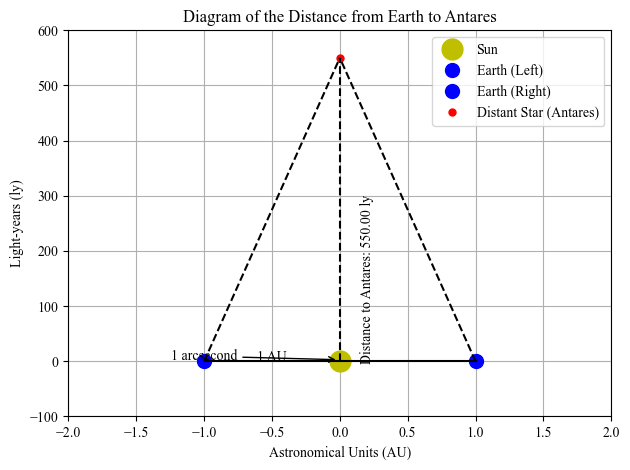

In [13]:
import matplotlib.pyplot as plt
from astropy import units as u
from astroquery.simbad import Simbad

# 查詢 Antares 的信息
result_table = Simbad.query_object("Antares")

# 檢查查詢的欄位
print(result_table.colnames)

# 設定距離，手動設為 550 光年
distance_in_ly = 550 * u.lyr  # 550 光年

# 圖中的點位置
sun_position = (0, 0)  # 太陽的位置
earth_position_left = (-1, 0)  # 左側地球的位置
earth_position_right = (1, 0)  # 右側地球的位置
star_position = (0, distance_in_ly.to(u.lyr).value)  # Antares 的位置

# 建立圖形和軸
fig, ax = plt.subplots()

# 繪製太陽、地球和遠方恆星
ax.plot(sun_position[0], sun_position[1], 'yo', markersize=15, label='Sun')
ax.plot(earth_position_left[0], earth_position_left[1], 'bo', markersize=10, label='Earth (Left)')
ax.plot(earth_position_right[0], earth_position_right[1], 'bo', markersize=10, label='Earth (Right)')
ax.plot(star_position[0], star_position[1], 'ro', markersize=5, label='Distant Star (Antares)')

# 繪製連線
ax.plot([sun_position[0], earth_position_left[0]], [sun_position[1], earth_position_left[1]], 'k-')
ax.plot([sun_position[0], earth_position_right[0]], [sun_position[1], earth_position_right[1]], 'k-')

# 使用虛線繪製地球到遠方恆星的連線
ax.plot([earth_position_left[0], star_position[0]], [earth_position_left[1], star_position[1]], 'k--')
ax.plot([earth_position_right[0], star_position[0]], [earth_position_right[1], star_position[1]], 'k--')
ax.plot([sun_position[0], star_position[0]], [sun_position[1], star_position[1]], 'k--')

# 標註
ax.annotate('1 AU', xy=(-0.5, -0.1), ha='center')
ax.annotate(f'Distance to Antares: {distance_in_ly.value:.2f} ly', xy=(0.2, 0.5), ha='center', rotation=90)
ax.annotate('1 arcsecond', xy=(-0.01, 2.9), xytext=(-1, 2), 
            arrowprops=dict(facecolor='black', arrowstyle='->'), ha='center')

# 設定圖表標題和軸標籤
ax.set_title('Diagram of the Distance from Earth to Antares')
ax.set_xlabel('Astronomical Units (AU)')
ax.set_ylabel('Light-years (ly)')

# 調整圖表範圍和顯示
ax.set_xlim(-2, 2)
ax.set_ylim(-100, 600)  # 設置 Y 軸顯示範圍

plt.legend()
plt.grid(True)
plt.rcParams['font.family'] = 'Times New Roman'
plt.tight_layout()
plt.show()


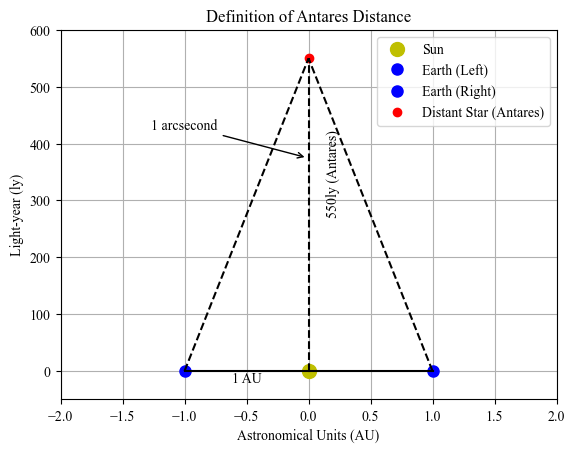

In [14]:
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u

# 查詢 Antares 的距離
distance_in_ly_antares = 550  # 假設 Antares 距離地球約 550 光年

# 定義星體位置
sun_position = (0, 0)  # 太陽的位置
earth_position_left = (-1, 0)  # 左側地球的位置
earth_position_right = (1, 0)  # 右側地球的位置
star_position = (0, distance_in_ly_antares)  # 使用 Antares 的距離作為 y 值

# 建立圖形和軸
fig, ax = plt.subplots()

# 繪製太陽、地球和遠方恒星
ax.plot(sun_position[0], sun_position[1], 'yo', markersize=10, label='Sun')
ax.plot(earth_position_left[0], earth_position_left[1], 'bo', markersize=8, label='Earth (Left)')
ax.plot(earth_position_right[0], earth_position_right[1], 'bo', markersize=8, label='Earth (Right)')
ax.plot(star_position[0], star_position[1], 'ro', markersize=6, label='Distant Star (Antares)')


# 繪製連線
# 繪製太陽到地球的連線
ax.plot([sun_position[0], earth_position_left[0]], [sun_position[1], earth_position_left[1]], 'k-')
ax.plot([sun_position[0], earth_position_right[0]], [sun_position[1], earth_position_right[1]], 'k-')
# 使用虛線繪製地球到遠方恆星的連線
ax.plot([earth_position_left[0], star_position[0]], [earth_position_left[1], star_position[1]], 'k--')
ax.plot([earth_position_right[0], star_position[0]], [earth_position_right[1], star_position[1]], 'k--')
# 太陽到遠方恆星的連線
ax.plot([sun_position[0], star_position[0]], [sun_position[1], star_position[1]], 'k--')

# 添加標註
ax.annotate('1 AU', xy=(-0.5, -20), ha='center')
ax.annotate(f'550ly (Antares)', xy=(0.2, distance_in_ly_antares / 2), ha='center', rotation=90)
ax.annotate('1 arcsecond', xy=(-0.01, distance_in_ly_antares / 2 + 100), xytext=(-1, distance_in_ly_antares / 2 + 150),
            arrowprops=dict(facecolor='black', arrowstyle='->'), ha='center')

# 設定圖表標題和軸標籤
ax.set_title('Definition of Antares Distance')
ax.set_xlabel('Astronomical Units (AU)')
ax.set_ylabel('Light-year (ly)')

# 調整圖表範圍
ax.set_xlim(-2, 2)
ax.set_ylim(-50, distance_in_ly_antares + 50)
plt.legend()
plt.rcParams['font.family'] = 'Times New Roman'
plt.grid(True)
plt.show()
